In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
from allensdk.brain_observatory.ecephys import ecephys_session
%matplotlib inline

# fix slow autocomplete
%config Completer.use_jedi = False

In [2]:
import platform
platstring = platform.platform()

if 'Darwin' in platstring:
    # OS X 
    data_root = "/Volumes/Brain2019/"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/"
elif ('amzn1' in platstring):
    # then on AWS
    data_root = "/data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2019/"

manifest_path = os.path.join(data_root, "dynamic-brain-workshop/visual_coding_neuropixels/2019/manifest.json")

In [3]:
cache = EcephysProjectCache.fixed(manifest=manifest_path)
sessions = cache.get_sessions()

In [4]:
hcareas = ['CA','DG']

hc_sessions = []
for i in np.arange(len(sessions.structure_acronyms)):
    sessionid = sessions.structure_acronyms.index[i]
    if any(elem in sessions.structure_acronyms[sessionid] for elem in hcareas):
        hc_sessions.append(sessionid)
        
# for i, sesh in enumerate(hc_sessions):
#     print(sessions.structure_acronyms[sesh])

In [5]:
# sesh_id = hc_sessions[0]
# session = cache.get_session_data(sesh_id)
# seshunits = session.units
# CA_units = seshunits[seshunits['structure_acronym'] == 'CA']
# DG_units = seshunits[seshunits['structure_acronym'] == 'DG']

In [6]:
allunits = cache.get_units(hc_sessions)

In [7]:
channelinfo = cache.get_channels()

In [8]:
ca_channelinfo = channelinfo[channelinfo.manual_structure_acronym == "CA"]
CA_units = allunits[allunits.peak_channel_id.isin(ca_channelinfo.index)]

In [9]:
dg_channelinfo = channelinfo[channelinfo.manual_structure_acronym == "DG"]
DG_units = allunits[allunits.peak_channel_id.isin(dg_channelinfo.index)]

In [10]:
# plt.hist(CA_units.snr, bins=30)
# plt.title('SNR')

In [11]:
# plt.hist(CA_units.isi_violations, bins=30)
# plt.title('ISI violations')

In [12]:
good_units_ca = CA_units[(CA_units.snr>1)&(CA_units.isi_violations<0.5)]
good_units_dg = DG_units[(DG_units.snr>1)&(DG_units.isi_violations<0.5)]

In [13]:
len(good_units_ca), len(good_units_dg)

(2267, 899)

In [14]:
#combine all these unit ID's into array or something iterable
#for each unit, pull it's spike duration (less than say 0.3 ms should classify FS or RSU)

good_units_ca.head()

,local_index_unit,cluster_ids,peak_channel_id,quality,snr,firing_rate,isi_violations,presence_ratio,amplitude_cutoff,isolation_distance,...,total_time_shift,has_lfp_nwb,structure_acronyms,session_type,specimen_id,genotype,gender,age_in_days,project_code,has_nwb
id,,,,,,,,,,,,,,,,,,,,,
914569746,55,55,849721922,good,2.620253,0.054259,0.000000,0.98,0.000494,159.865368,...,-3.777523,True,"['CA', 'TH', 'VISam', None]",brain_observatory_1.1,740268986,wt,M,0.0,NeuropixelVisualCoding,True
914569748,56,56,849721922,good,3.257596,0.054155,0.000000,0.98,0.062166,184.330716,...,-3.777523,True,"['CA', 'TH', 'VISam', None]",brain_observatory_1.1,740268986,wt,M,0.0,NeuropixelVisualCoding,True
914569770,67,67,849721986,good,1.490218,7.986775,0.071186,0.99,0.093998,53.216820,...,-3.777523,True,"['CA', 'TH', 'VISam', None]",brain_observatory_1.1,740268986,wt,M,0.0,NeuropixelVisualCoding,True
914569786,75,75,849721988,good,2.004680,19.745969,0.045091,0.99,0.010465,61.303457,...,-3.777523,True,"['CA', 'TH', 'VISam', None]",brain_observatory_1.1,740268986,wt,M,0.0,NeuropixelVisualCoding,True
914569824,94,94,849722010,good,2.490790,5.228805,0.153310,0.99,0.065138,37.921554,...,-3.777523,True,"['CA', 'TH', 'VISam', None]",brain_observatory_1.1,740268986,wt,M,0.0,NeuropixelVisualCoding,True


In [15]:
good_units_ca.columns

Index(['local_index_unit', 'cluster_ids', 'peak_channel_id', 'quality', 'snr',
       'firing_rate', 'isi_violations', 'presence_ratio', 'amplitude_cutoff',
       'isolation_distance', 'l_ratio', 'd_prime', 'nn_hit_rate',
       'nn_miss_rate', 'silhouette_score', 'max_drift', 'cumulative_drift',
       'epoch_name_quality_metrics', 'epoch_name_waveform_metrics', 'duration',
       'halfwidth', 'PT_ratio', 'repolarization_slope', 'recovery_slope',
       'amplitude', 'spread', 'velocity_above', 'velocity_below',
       'ecephys_probe_id', 'local_index_channel', 'probe_vertical_position',
       'probe_horizontal_position', 'manual_structure_id',
       'manual_structure_acronym', 'ecephys_session_id',
       'global_probe_sampling_rate', 'global_probe_lfp_sampling_rate',
       'total_time_shift', 'has_lfp_nwb', 'structure_acronyms', 'session_type',
       'specimen_id', 'genotype', 'gender', 'age_in_days', 'project_code',
       'has_nwb'],
      dtype='object')

In [16]:
fs_ca = good_units_ca[good_units_ca.duration<0.4]
rsu_ca = good_units_ca[good_units_ca.duration>0.4]

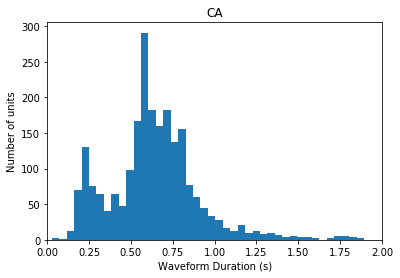

In [22]:
plt.hist(good_units_ca.duration,bins=60)
plt.xlim(0,2)
plt.xlabel('Waveform Duration (s)')
plt.ylabel('Number of units')
plt.title('CA')

plotname = 'CA_FSRSU_duration_hist' + '_allsessions_' + '.png'
filename = os.path.abspath(os.getcwd()+'/../buzsaki_plots/'+ plotname)
plt.savefig(filename,dpi=300)

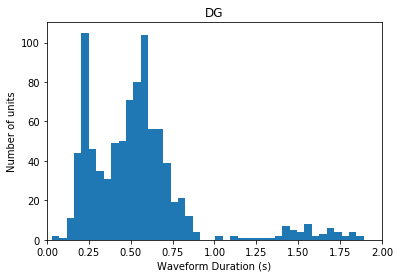

In [23]:
plt.hist(good_units_dg.duration,bins=60)
plt.xlim(0,2)
plt.xlabel('Waveform Duration (s)')
plt.ylabel('Number of units')
plt.title('DG')

plotname = 'DG_FSRSU_duration_hist' + '_allsessions_' + '.png'
filename = os.path.abspath(os.getcwd()+'/../buzsaki_plots/'+ plotname)
plt.savefig(filename,dpi=300)

In [309]:
plt.hist(good_units_ca.recovery_slope,bins=60)
plt.xlim(-1,0)
plt.xlabel('Recovery slope (s)')
plt.ylabel('Number of units')
plt.title('DG')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'DG')

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Recovery slope')

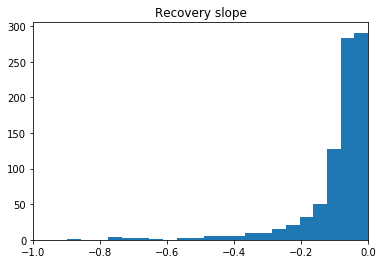

In [20]:
plt.hist(good_units_dg.recovery_slope,bins=60)
plt.xlim(-1,0)
plt.title('Recovery slope')


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Waveform_halfwidth')

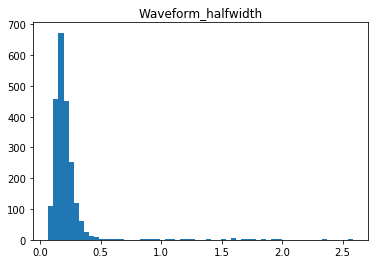

In [21]:
plt.hist(good_units_ca.halfwidth,bins=60)
plt.title('Waveform_halfwidth')

<b>Waveform duration across dentage gyrus channels</b>

In [22]:
#this is probably the wrong way to do this...skip this cell

# plt.plot(np.arange(len(good_units_dg)),good_units_dg.sort_values('probe_vertical_position')['duration'])

In [23]:
probes = good_units_dg.ecephys_probe_id.unique()

In [24]:
for i,probe in enumerate(probes):
    dg_units_on_probe = len(good_units_dg[good_units_dg.ecephys_probe_id==probe])
    print(probe, dg_units_on_probe)

769322789 3
769322793 1
769322797 21
810753195 5
810753197 21
810753199 24
810753203 22
792676156 36
792676158 1
792676160 25
792676162 44
768909182 5
768909184 3
768909186 11
760642621 2
760642624 5
760642628 9
760642631 5
760642634 3
760642637 15
757968489 4
757968491 3
757968493 11
757968495 9
757968497 10
757968499 12
770930073 4
770930077 35
757988389 2
757988391 5
757988395 13
757988398 17
757904508 3
757904513 2
757904516 1
757904520 8
757904522 8
760640083 8
760640087 2
760640094 31
760640097 9
760640104 10
760640033 8
760640037 6
760640039 5
760640043 13
760640049 9
760647905 5
760647907 7
760647909 36
760647911 9
760647913 5
760647915 13
768908579 8
768908582 5
768908585 26
768908589 10
768908591 7
769322824 1
769322827 7
769322829 10
769322831 36
769322833 4
768908148 1
768908152 21
768908157 7
768908160 14
757984813 4
757984818 5
757984820 8
757984822 24
757984826 5
757984830 9
769322747 6
769322749 12
769322751 25
769322753 9
769322755 10
769322802 6
769322804 5
769322808 

In [25]:
# dg_units_oneprobe = good_units_dg[good_units_dg.ecephys_probe_id==768908152] #for single probe analysis
dg_units_oneprobe = good_units_dg #for all probes analysis

In [26]:
dg_probe_vertsorted = dg_units_oneprobe.sort_values('probe_vertical_position')

Text(0.5, 1.0, 'Waveform Duration across Dentate Gyrus')

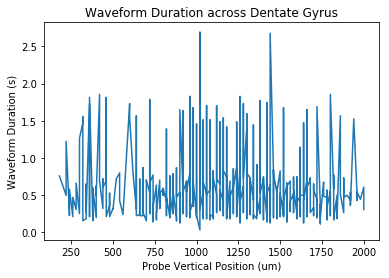

In [27]:
plt.plot(np.asarray(dg_probe_vertsorted.probe_vertical_position),dg_probe_vertsorted.duration)
plt.xlabel('Probe Vertical Position (um)')
plt.ylabel('Waveform Duration (s)')
plt.title('Waveform Duration across Dentate Gyrus')

<b>Looking across stimuli</b>

In [191]:
session_to_query = hc_sessions[0]

In [65]:
session = cache.get_session_data(session_to_query)

In [97]:
spike_times = session.spike_times
unit_id = session.units[session.units.structure_acronym=='VISp'].index[12]
spikes = spike_times[unit_id]
numbins = int(np.ceil(spikes.max()))

In [102]:
ca_units = session.units[session.units.structure_acronym=='CA']
numunits = len(ca_units)
# if numunits>50:
#     numunits=50
ca_binned = np.empty((numunits, numbins))
for i in range(numunits):
    unit_id = ca_units.index[i]
    spikes = spike_times[unit_id]
    for j in range(numbins):
        ca_binned[i,j] = len(spikes[(spikes>j)&(spikes<j+1)]) 

<IPython.core.display.Javascript object>


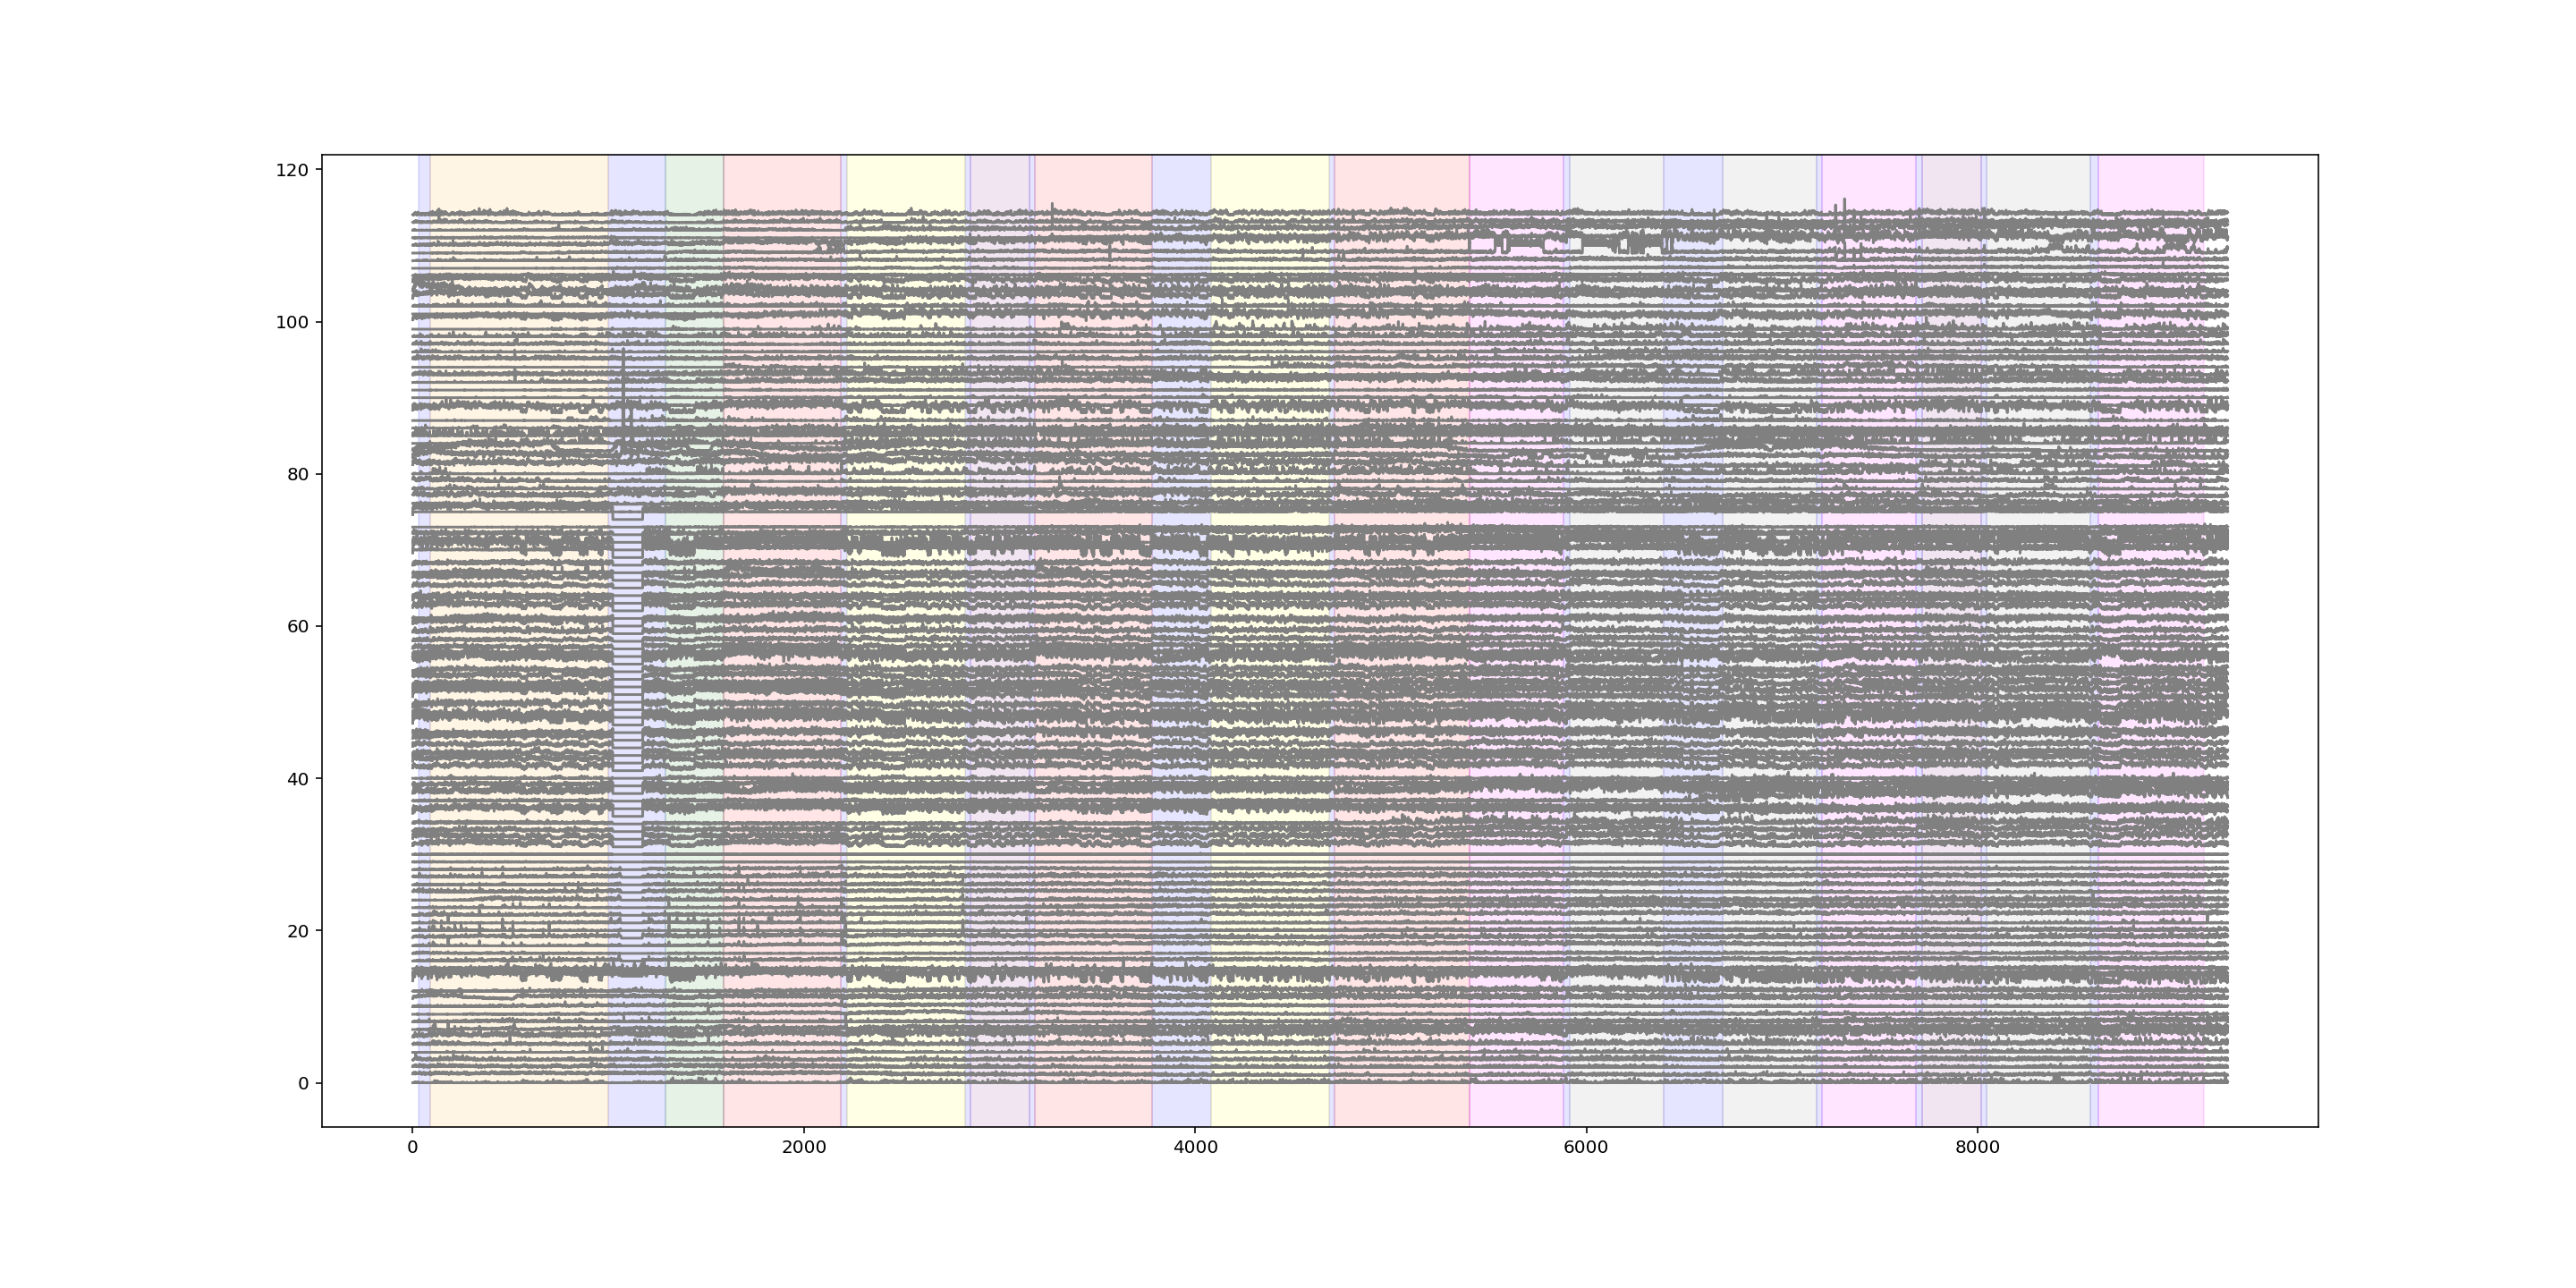

In [108]:
stimulus_epochs = session.get_stimulus_epochs()
# %matplotlib notebook
plt.figure(figsize=(20,10))
for i in range(numunits):
    plt.plot(i+(ca_binned[i,:]/30.), color='gray')

colors = ['blue','orange','green','red','yellow','purple','magenta','gray','lightblue']
for c, stim_name in enumerate(session.stimulus_names):
    stim = stimulus_epochs[stimulus_epochs.stimulus_name==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim["start_time"].iloc[j], xmax=stim["stop_time"].iloc[j], color=colors[c], alpha=0.1)
        

In [116]:
#get lfp
#bandpass to theta range (3-12)
#plot across stimulus epochs

(115, 9278)

In [291]:
probenumber = session.probes.index[0]

In [290]:
sessionid = sessions.index[0]
session_info = cache.get_session_data(sessionid)
probeid = session_info.probes.index[0]

,session_type,specimen_id,genotype,gender,age_in_days,project_code,probe_count,channel_count,unit_count,has_nwb,structure_acronyms
id,,,,,,,,,,,
737581020,brain_observatory_1.1,718643567,wt,M,108.0,NeuropixelVisualCoding,6,396,601,True,"[CA, DG, MB, TH, VISl, VISmma, VISp, VISpm, VI..."
739448407,brain_observatory_1.1,716813543,wt,M,112.0,NeuropixelVisualCoding,6,422,654,True,"[CA, DG, MB, TH, VIS, VISam, VISl, VISp, VISrl..."
744228101,brain_observatory_1.1,719817805,wt,M,122.0,NeuropixelVisualCoding,6,433,696,True,"[CA, DG, MB, TH, VIS, VISal, VISl, VISp, VISrl..."
746083955,brain_observatory_1.1,726170935,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,F,98.0,NeuropixelVisualCoding,6,412,628,True,"[CA, DG, MB, TH, VISal, VISl, VISp, VISpm, VIS..."
750749662,brain_observatory_1.1,726162197,wt,M,92.0,NeuropixelVisualCoding,6,509,813,True,"[CA, DG, MB, TH, VISal, VISam, VISl, VISp, VIS..."
751348571,brain_observatory_1.1,732548380,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,F,93.0,NeuropixelVisualCoding,6,545,906,True,"[CA, DG, MB, TH, VISam, VISl, VISp, VISpm, VIS..."
754829445,brain_observatory_1.1,726298253,wt,M,0.0,NeuropixelVisualCoding,5,532,863,True,"[CA, DG, MB, TH, VIS, VISam, VISl, VISp, VISrl..."
755434585,brain_observatory_1.1,730760270,Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,0.0,NeuropixelVisualCoding,6,419,688,True,"[CA, DG, MB, TH, VISal, VISam, VISl, VISp, VIS..."
756029989,brain_observatory_1.1,734865738,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,M,0.0,NeuropixelVisualCoding,6,436,714,True,"[CA, DG, MB, TH, VISal, VISam, VISl, VISp, VIS..."


In [289]:
ca_channelinfo.head()

,ecephys_probe_id,local_index,probe_vertical_position,probe_horizontal_position,manual_structure_id,manual_structure_acronym,unit_count
id,,,,,,,
849721922,769322785,101,1020.0,11.0,375.0,CA,2
849721986,769322785,133,1340.0,11.0,375.0,CA,1
849721988,769322785,134,1360.0,59.0,375.0,CA,1
849722008,769322785,144,1460.0,43.0,375.0,CA,1
849722010,769322785,145,1460.0,11.0,375.0,CA,5


In [259]:
channelsonprobe = ca_channelinfo[ca_channelinfo.ecephys_probe_id == probenumber]

In [279]:
lfpchannel = channelsonprobe.index[1]

In [280]:
lfp = session.get_lfp(probe_id=probenumber)

In [282]:
lfp.channel==lfpchannel

<xarray.DataArray 'channel' (channel: 83)>
array([False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False,
       False, False, False])
Coordinates:
  * channel  (channel) int64 850217349 850217357 ... 850217997 850218005

In [263]:
channel = lfp.loc[dict(channel==lfpchannel)]

TypeError: iteration over a 0-d array

In [234]:
# channel = lfp.channel[0]
lfp_subset = lfp.loc[dict(channel=channel)]

# you might then want to clear the full LFP from memory if not using it
lfp = None

# plt.figure(figsize=(12,3))
# lfp_subset.plot()
# plt.show()

AttributeError: 'NoneType' object has no attribute 'channel'

<IPython.core.display.Javascript object>


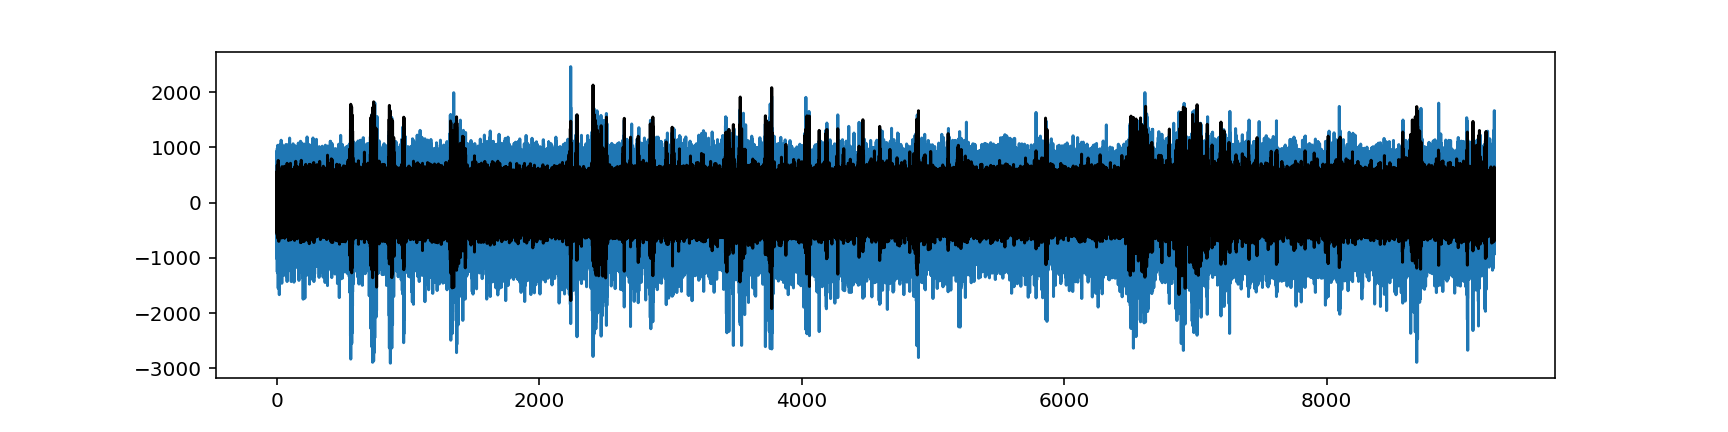

In [152]:
import scipy.signal

t = lfp_subset.time.values
v = lfp_subset.values

freq_window = (3, 12)
filt_order = 3
fs = 1/(t[1]-t[0])
b, a = scipy.signal.butter(filt_order, freq_window, btype='bandpass', fs=fs)
v_alpha = scipy.signal.lfilter(b, a, v)


plt.figure(figsize=(12,3))
plt.plot(t, v)
plt.plot(t, v_alpha,'k')

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


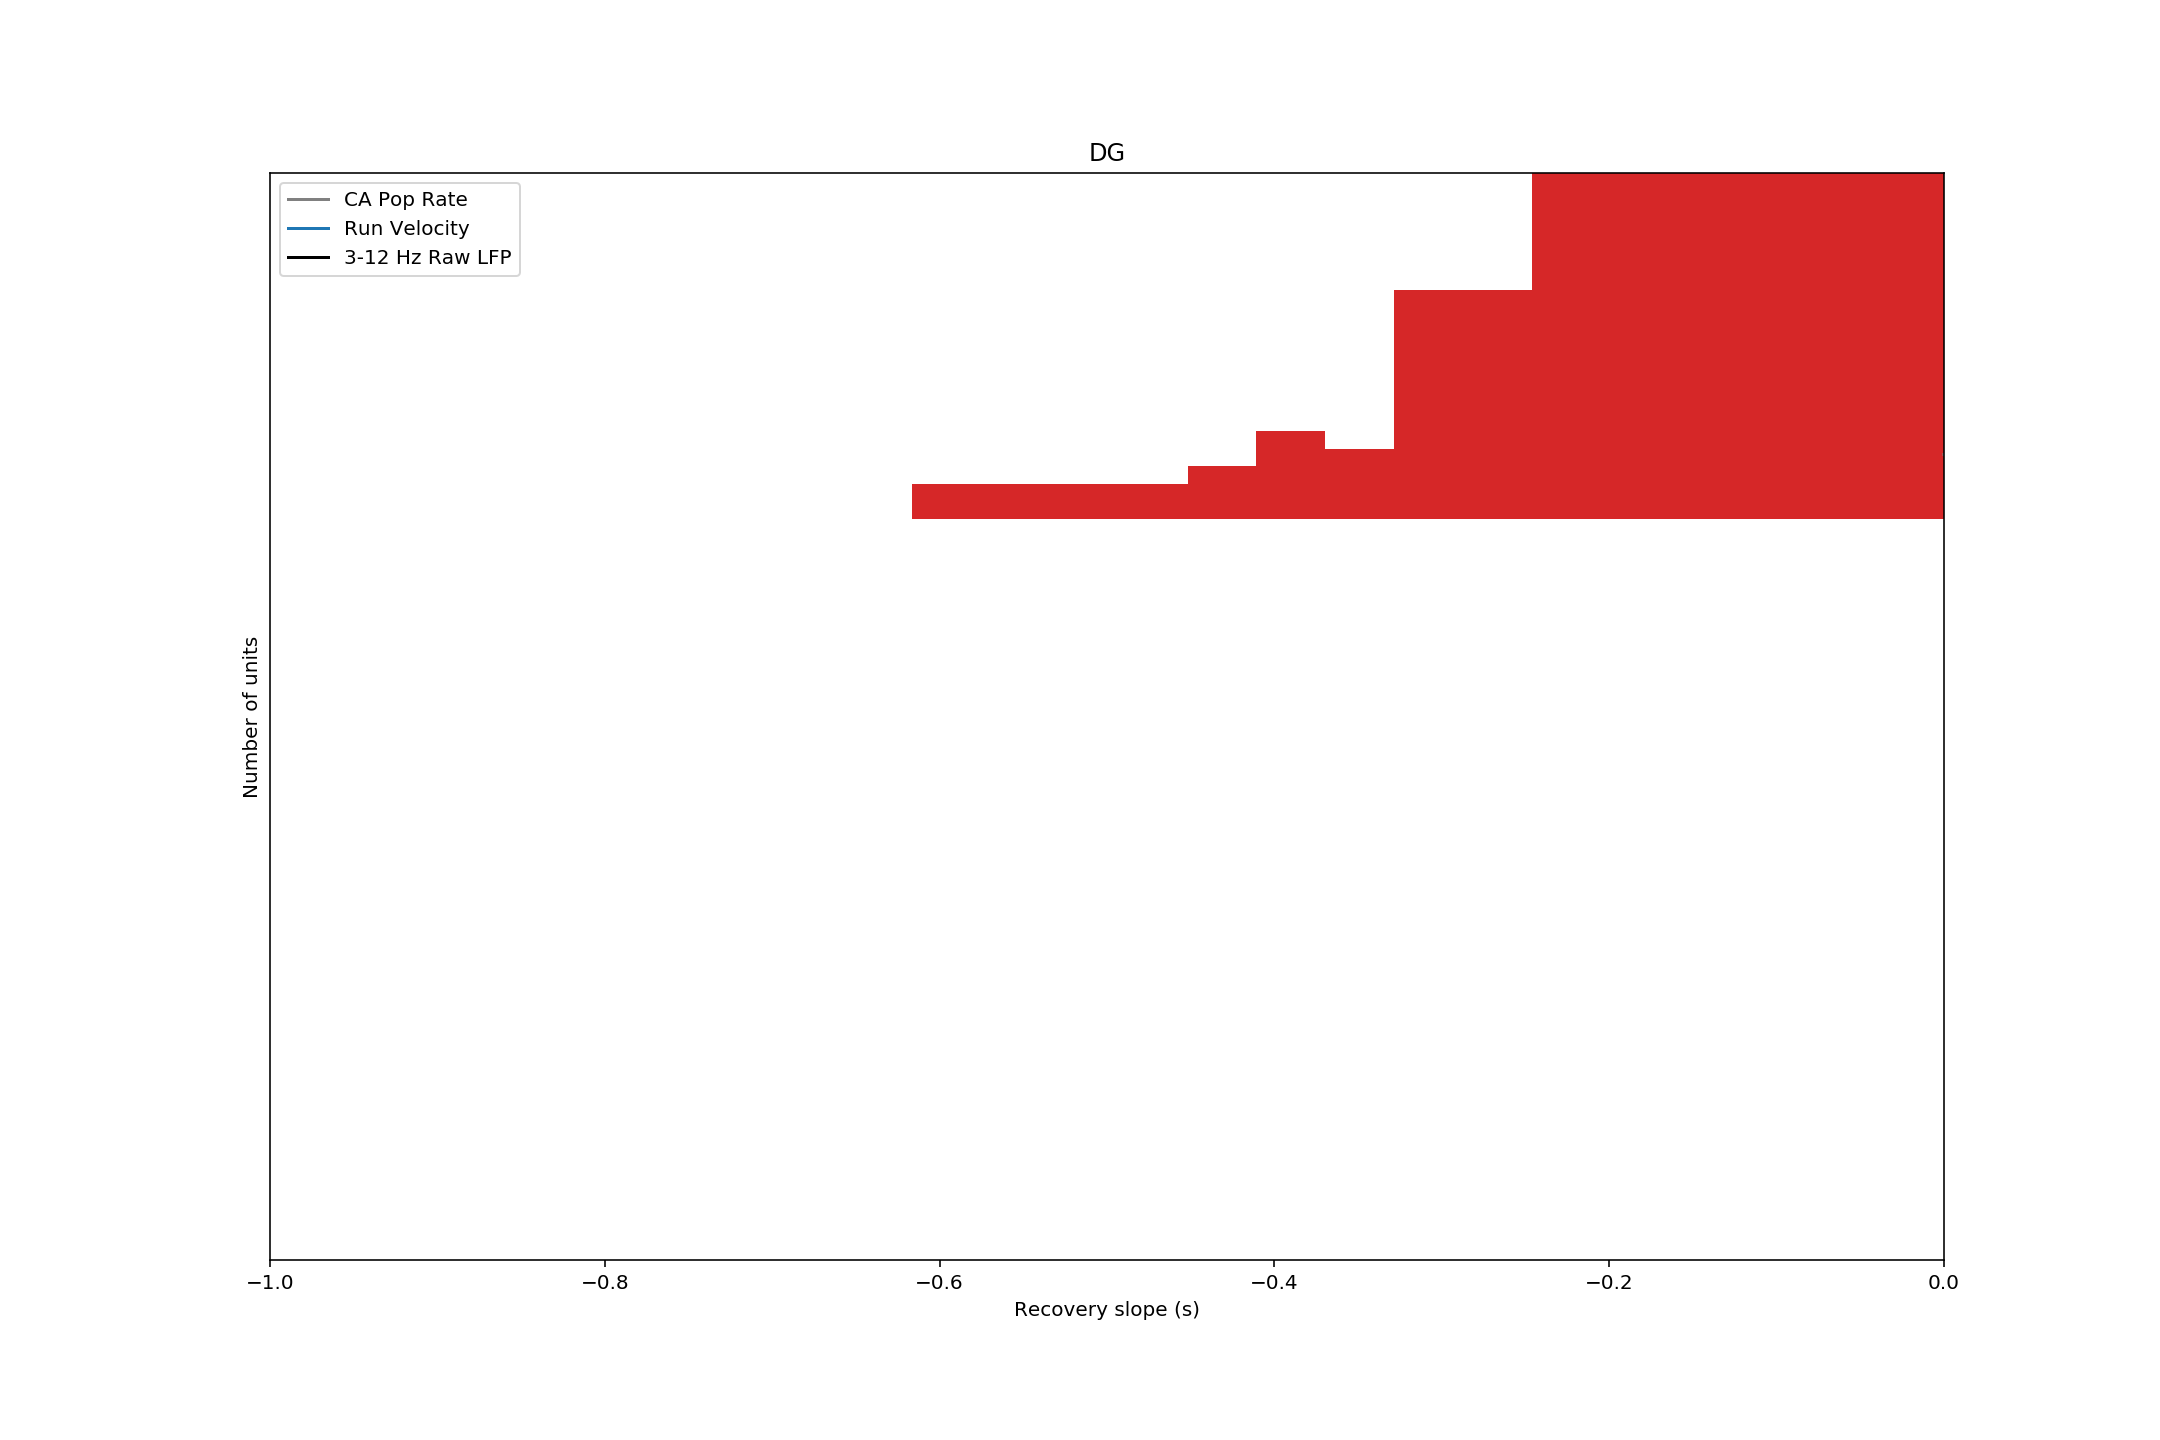

In [221]:
%matplotlib auto
pop_binned = np.mean(ca_binned,axis=0)

plt.figure(figsize=(15,10))
    
plt.plot(pop_binned,color='gray',label='CA Pop Rate')

colors = ['blue','orange','green','red','yellow','purple','magenta','gray','lightblue']
for c, stim_name in enumerate(session.stimulus_names):
    stim = stimulus_epochs[stimulus_epochs.stimulus_name==stim_name]
#     plt.text(stim["start_time"],12,stim_name)
    for j in range(len(stim)):
        plt.axvspan(xmin=stim["start_time"].iloc[j], xmax=stim["stop_time"].iloc[j], color=colors[c], alpha=0.1)
        
plt.plot(session.running_speed.end_time, (0.1*session.running_speed.velocity)-10,label = 'Run Velocity')

plt.plot(t, 0.005*v_alpha - 25,'k', label='3-12 Hz Raw LFP')

plt.legend(loc='upper left')
plt.yticks([])
plt.xlabel('Time (s)')

plotname = 'CA_poprate_runspeed_theta_sesssion' + str(session_to_query) + '_probe' + str(probenumber) + '_chan' + str(channel.values) + '.png'
filename = os.path.abspath(os.getcwd()+'/../buzsaki_plots/'+ plotname)
plt.savefig(filename,dpi=300)